In [1]:
import pandas as pd
point = pd.read_parquet('./material/soc.topsoil_organized.pq')
series = pd.read_parquet('./material/time.series_lucas_plausible.pq')

## general data distribution

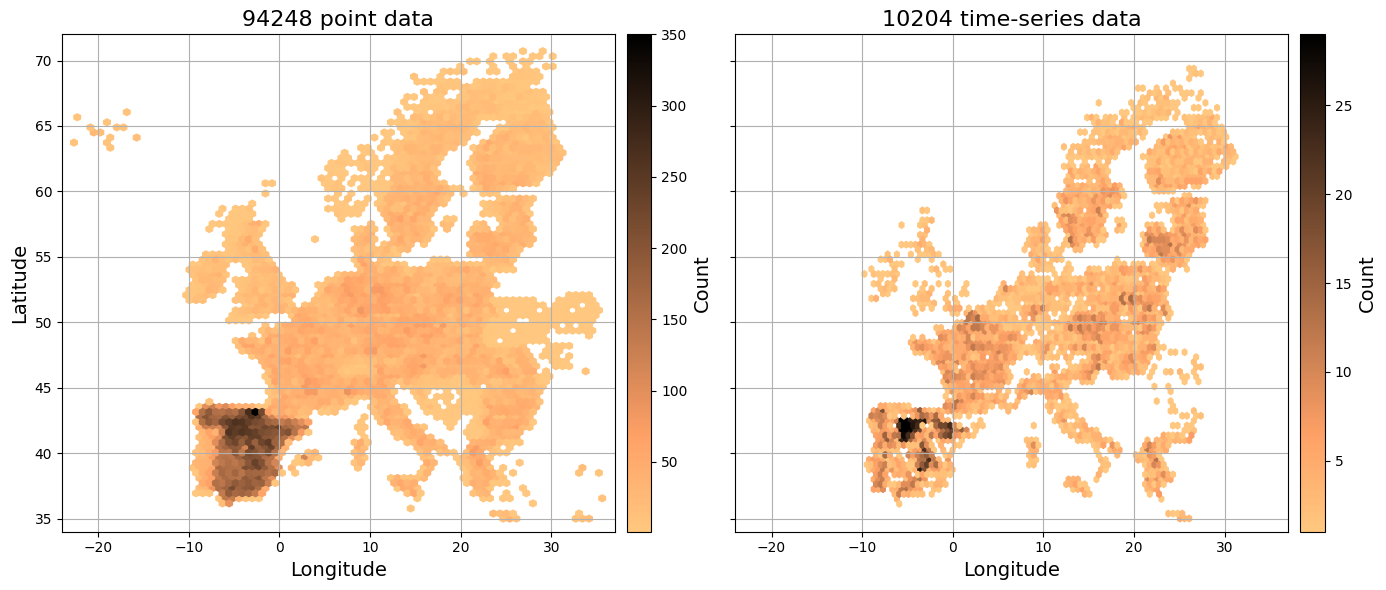

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with 2 subplots (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # share lat axis

# ==== Left Plot: Hexbin for `point` dataset ====
hexbin1 = axes[0].hexbin(point['lon'], point['lat'], gridsize=80, cmap='copper_r', mincnt=1)
axes[0].set_xlabel('Longitude', fontsize=14)
axes[0].set_ylabel('Latitude', fontsize=14)
axes[0].set_title(f'{len(point)} point data', fontsize=16)
axes[0].set_xlim([-24, 37])
axes[0].set_ylim([34, 72])
colorbar1 = fig.colorbar(hexbin1, ax=axes[0], orientation='vertical', fraction=0.05, pad=0.02)
colorbar1.set_label('Count', fontsize=14)
axes[0].grid(True)

# ==== Right Plot: Hexbin for `series` dataset ====
hexbin2 = axes[1].hexbin(series['lon_mean'], series['lat_mean'], gridsize=80, cmap='copper_r', mincnt=1)
axes[1].set_xlabel('Longitude', fontsize=14)
axes[1].set_title(f'{len(series)} time-series data', fontsize=16)
axes[1].set_xlim([-24, 37])
colorbar2 = fig.colorbar(hexbin2, ax=axes[1], orientation='vertical', fraction=0.05, pad=0.02)
colorbar2.set_label('Count', fontsize=14)
axes[1].grid(True)

plt.tight_layout()
plt.savefig(f'./figure/data_spatial.distribution.pdf', format='pdf')
plt.show()




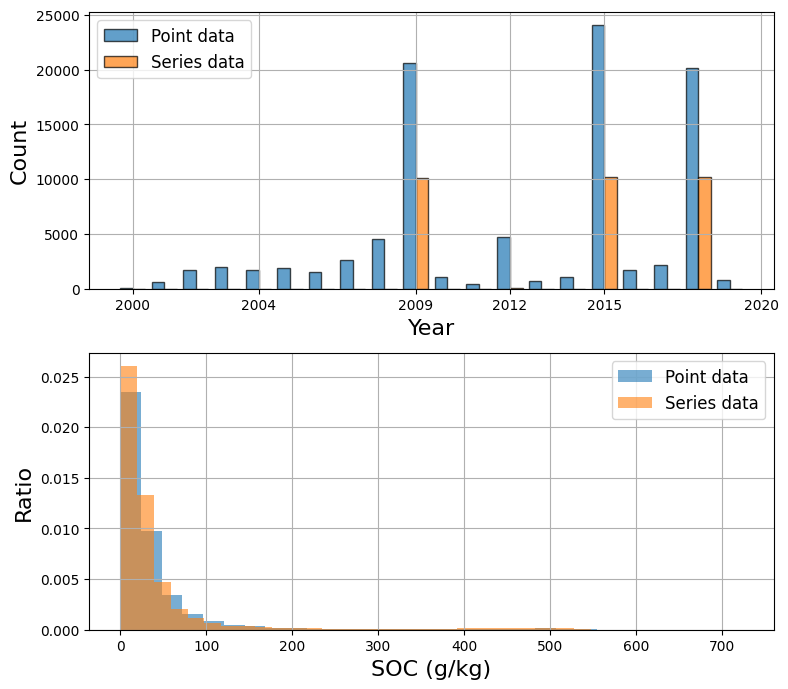

In [3]:
pnt_series = point.loc[point['id'].isin(series['id'].values)]


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7))

### === Top Plot: Time distribution (barplot-like histogram for both datasets) ===

# Create time bins
time_bins = np.arange(min(point['time'].min(), pnt_series['time'].min()), 
                      max(point['time'].max(), pnt_series['time'].max()) + 1)

# Histogram counts per year
point_counts, _ = np.histogram(point['time'], bins=time_bins)
series_counts, _ = np.histogram(pnt_series['time'], bins=time_bins)

# X-axis (mid of bins)
bin_centers = time_bins[:-1]
bar_width = 0.4

# Bar plots for both datasets (side-by-side)
ax1.bar(bin_centers - bar_width/2, point_counts, width=bar_width, label='Point data', alpha=0.7, edgecolor='black')
ax1.bar(bin_centers + bar_width/2, series_counts, width=bar_width, label='Series data', alpha=0.7, edgecolor='black')

# X-axis formatting
x_ticks = [2000, 2004, 2009, 2012, 2015, 2020]
ax1.set_xticks(x_ticks)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.legend(fontsize=12)
ax1.grid(True)

### === Bottom Plot: SOC Histogram for both datasets (Ratio instead of Count) ===
hist1 = ax2.hist(point['soc'], bins=30, density=True, alpha=0.6, label='Point data')  # Removed edgecolor
hist2 = ax2.hist(pnt_series['soc'], bins=30, density=True, alpha=0.6, label='Series data')  # Removed edgecolor

ax2.set_xlabel('SOC (g/kg)', fontsize=16)
ax2.set_ylabel('Ratio', fontsize=16)  # Show ratio instead of count
ax2.legend(fontsize=12)
ax2.grid(True)

plt.tight_layout()
plt.savefig(f'./figure/data_temp.hist.distribution.pdf', format='pdf')
plt.show()


## descriptive stats

In [8]:
stat = point.groupby(['ref'])['soc'].describe()[['count','mean','50%','std']]

In [10]:
stat['n_site'] = np.nan
for ii in point['ref'].unique():
    ln = len(point.loc[point['ref']==ii, 'id'].unique())
    stat.loc[stat.index==ii,'n_site'] = ln

In [14]:
stat.sort_values(by='count',ascending=False)[['n_site','count','mean','50%','std']]

,n_site,count,mean,50%,std
ref,,,,,
LUCAS,27737.0,62437.0,45.978352,20.700000,82.029290
ParcelasINES,22152.0,22155.0,35.554598,22.750000,38.591988
gemas,4004.0,4004.0,32.689111,21.000000,47.251926
thuenen.bze.lw,2953.0,2953.0,30.069683,18.372983,49.221224
GLanCE,351.0,911.0,0.000000,0.000000,0.000000
ParcelasCOS,789.0,789.0,40.784685,27.170000,34.643113
basque,443.0,443.0,44.159063,38.675000,28.189383
Czech,236.0,424.0,18.004938,16.445000,6.511033
MarSOC,74.0,74.0,38.216437,19.376500,62.171372
